In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy as sp
from pylab import *
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.algorithms import bipartite
import random as rd
from collections import Counter
import pylab 
import scipy.stats as stats
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
cd /Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC011/breaking_time_lapses/Final/

/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Data/eEMC011/breaking_time_lapses/Final


In [3]:
files=sorted(os.listdir())
size_data=pd.DataFrame()

for f in files:
    if('.csv' in f):
        df=pd.read_csv(f)
        size_data=size_data.append(df,ignore_index=True)

size_data['TotalInt']=size_data['Area']*size_data['Mean']
cell_count=size_data['TotalInt']
cell_arr=np.array(cell_count).reshape(int(len(cell_count)/3),3)

In [4]:
s_s_s=[]
s_s_b=[]
s_s_t=[]
for a in cell_arr:
    s_s_t.append(a[1]+a[2])
    if(a[2]>a[1]):
        s_s_s.append(a[1])
        s_s_b.append(a[2])
    else:
        s_s_s.append(a[2])
        s_s_b.append(a[1])

df=pd.DataFrame({'s':s_s_s,'b':s_s_b,'t':s_s_t})
df['s_f']=df['s']/df['t']
df['b_f']=df['b']/df['t']
df['n']=-np.log2(df['s_f'])

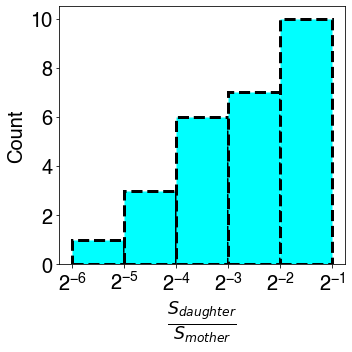

In [9]:
plt.rc('font',family='helvetica')
plt.figure(figsize=(5,5))
plt.hist(df['s_f'],linestyle='--',bins=np.logspace(-6,-1,base=2,num=6),edgecolor='black',linewidth=3,color='cyan')
plt.xlabel(r'$\frac{S_{daughter}}{S_{mother}}$',fontsize=25)
plt.ylabel('Count',fontsize=20)
# plt.xlim([0.01,1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.text(2**-6,5,'n=28',fontsize=20)
plt.xscale('log',base=2)
plt.tight_layout()

plt.savefig('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Figures/Final/Breaking_Dynamics_Fraction_exp.jpg',dpi=1200)

In [40]:
a,ratios=np.histogram(df['s_f'],bins=np.logspace(-6,-1,base=2,num=6))
d=pd.DataFrame({'Freq':a})
d.to_csv('/Users/piyushnanda/Documents/PhD_MurrayLab/EMC/Analysis/Ratio/ratio_exp.csv')